# Numpyの基礎：配列とベクトル演算
NumpyのアルゴリズムはPython標準で提供される同等機能と比較して１０倍から１００倍、あるいはそれ以上に高速に動作する  
さらに、要求するメモリ量も格段に少なくて済む

In [2]:
import numpy as np

my_arr=np.arange(1000000)
my_list=list(range(1000000))

In [3]:
%time for _ in range(10):myarr2=my_arr*2

CPU times: user 20 ms, sys: 10.5 ms, total: 30.5 ms
Wall time: 36.8 ms


In [5]:
%time for _ in range(10):my_list2=[x*2 for x in my_list]

CPU times: user 606 ms, sys: 163 ms, total: 770 ms
Wall time: 783 ms


## 4.1 Numpy ndarray：多次元配列オブジェクト

### 4.1.1 ndarrayの生成

In [7]:
data1=[3,2.5,3,6,5]
arr1=np.array(data1)
arr1

array([3. , 2.5, 3. , 6. , 5. ])

In [15]:
arr1.ndim

1

In [16]:
arr1.shape

(5,)

In [11]:
data2=[[1,2,3,4,5],[3,4,5,3,2]]
arr2=np.array(data2)
arr2

array([[1, 2, 3, 4, 5],
       [3, 4, 5, 3, 2]])

In [14]:
arr2.ndim

2

In [17]:
arr2.shape

(2, 5)

In [12]:
#要素の型を明示的に指定せずnp.arrayを呼び出した場合、np.arrayは最適な方を推測しようする
print(arr1.dtype)
print(arr2.dtype)

float64
int64


In [20]:
#np.emptyで返される配列要素が０であることは保証されていないので注意
arr3=np.empty((2,3,4))
arr3

array([[[1.72723371e-077, 1.72723371e-077, 1.29441743e-312,
         1.93101617e-312],
        [9.33678148e-313, 9.33678148e-313, 9.33678148e-313,
         9.33678148e-313],
        [1.97345609e-312, 2.12199579e-313, 2.41907520e-312,
         1.06099790e-312]],

       [[2.33419537e-312, 9.76118064e-313, 2.41907520e-312,
         2.05833592e-312],
        [8.48798317e-313, 2.05833592e-312, 2.05833592e-312,
         8.70018275e-313],
        [2.05833592e-312, 2.41907520e-312, 2.12199579e-313,
         1.67313542e-308]]])

In [21]:
arr3.dtype

dtype('float64')

### 4.1.2 ndarrayのデータ型

In [30]:
arr1=np.array([1.44,2.33,3.55],dtype=np.float64)
arr2=np.array([3,4,5],dtype=np.int32)

In [31]:
arr1.dtype

dtype('float64')

In [32]:
arr2.dtype

dtype('int32')

In [33]:
#明示的な型変換（キャスト）
float_arr=arr2.astype('float64')
float_arr.dtype

dtype('float64')

In [34]:
#小数型を整数型にキャストすると小数部分は切り捨てられる
int_arr=arr1.astype('int32')
int_arr

array([1, 2, 3], dtype=int32)

In [39]:
#文字列型からfloat型へのキャスト
numeric_strings=np.array(['1.34','3.32','2.33','3.4446662224444'],dtype=np.string_)   #numpyの文字列データは固定長であるため、警告なしに切り捨てられる可能性があるため注意
numeric_strings=numeric_strings.astype(float)
numeric_strings

array([1.34      , 3.32      , 2.33      , 3.44466622])

In [40]:
#あるarrayのdtypeに別のarrayのdtypeを適用することもできる
int_array=np.arange(10)
calibers=np.array([.22,.270,.357,.380,.44,.50],dtype=np.float64)
print(int_array.dtype)
print(calibers.dtyp

int64
float64


In [44]:
new_array=int_array.astype(calibers.dtype)    #astypeを呼び出す際に必ず新規arrayが生成される（データがコピーされる）ことに注意
print(int_array.dtype)  #コピー元は変更されない
print(new_array.dtype)

int64
float64


### 4.1.3 ndarray間の算術演算

In [45]:
#ndarray間を比較したとき、その結果は同要素数の真偽値配列として戻される
arr1=np.array([[1,2,3],[4,5,6]])
arr2=np.array([[3,2,1],[5,7,3]])
arr1>arr2

array([[False, False,  True],
       [False, False,  True]])

### 4.1.4 インデックス参照とスライシングの基礎

In [46]:
#スライスへの変更が元のndarrayに反映されることに注意（元のndarrayのコピー（新規オブジェクト）ではない）
arr=np.arange(10)
arr_slice=arr[5:8]
arr_slice

array([5, 6, 7])

In [47]:
arr_slice[0]=100
print(arr_slice)
print(arr)  #変更が元のndarrayにも適用される

[100   6   7]
[  0   1   2   3   4 100   6   7   8   9]


In [49]:
#スライスをビューではなくndarrayからコピーして生成する必要がある場合
arr_slice2=arr[5:8].copy()  #arr_slice2は別の新規オブジェクトになる
arr_slice2[0]=200
print(arr_slice2)
print(arr)

[200   6   7]
[  0   1   2   3   4 100   6   7   8   9]


In [51]:
#2次元以上の高次元配列へのアクセス方法
arr2d=np.array([[1,2,3],[4,5,6]])
arr2d[1]

array([4, 5, 6])

In [53]:
arr2d[0][1]

2

In [54]:
arr2d[0,1]

2

In [57]:
#多次元配列のインデックス参照では後方のインデックスを省略することができる
arr3d=np.array([[[1,2,3],[4,5,6]],[[7,8,9],[10,11,12]]])
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [58]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

In [59]:
old_values=arr3d[0].copy()
arr3d[0]=42 #スカラーを代入することができる
arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [60]:
arr3d[0]=old_values #ndarrayを代入することもできる
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [61]:
arr3d[1,0]

array([7, 8, 9])

#### 4.1.4.1 スライスによるインデックス参照

In [62]:
#１次元配列のスライシング
arr=np.array([1,2,3,4,64,64,64,8,9])
arr

array([ 1,  2,  3,  4, 64, 64, 64,  8,  9])

In [63]:
arr[1:6]

array([ 2,  3,  4, 64, 64])

In [66]:
#2次元配列のスライシング
arr2d=np.array([[1,2,3],[4,5,6],[7,8,9]])
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [67]:
arr2d[:2]   #2行目まで切り出す

array([[1, 2, 3],
       [4, 5, 6]])

In [68]:
arr2d[:2,1:]    #2行目までの2列目以降を切り出す

array([[2, 3],
       [5, 6]])

In [69]:
arr2d[1,:2] #2行目の2列目まで切り出す

array([4, 5])

In [70]:
arr2d[:2,2] #2行目までの3列目のみ切り出す

array([3, 6])

In [71]:
#単独のコロン：は軸全体を表す
arr2d[:,:1] #全ての行の1列目のみ切り出す

array([[1],
       [4],
       [7]])

In [72]:
#スライス表記へのスカラー値の代入は、その範囲の要素すべてに対する代入を意味する
arr2d[:2,1:]=0
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

### 4.1.5 ブールインデックス参照

In [73]:
names=np.array(['Bob','Joe','Will','Bob','Will','Joe','Joe'])
data=np.random.randn(7,4)
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [74]:
data

array([[-0.90069764,  1.34761917,  0.91263554, -0.01773645],
       [-1.10692115, -0.9915654 ,  1.71594173,  2.11988485],
       [ 0.33111556, -0.63017224,  0.42194517,  0.34479696],
       [-0.68768566,  0.42374614, -0.73176742,  1.22827228],
       [-0.5881867 , -0.44843902, -1.74213487, -0.31977918],
       [ 0.25977065, -0.12938464,  0.21154536,  0.95211184],
       [ 0.23727349,  0.0305874 , -0.88941902,  0.05520465]])

In [75]:
#namesの各要素が'Bob'であるかを示す真偽値配列を得る
names=='Bob'

array([ True, False, False,  True, False, False, False])

In [76]:
#真偽値配列をdataのインデックスとして渡すことができる
data[names=='Bob']

array([[-0.90069764,  1.34761917,  0.91263554, -0.01773645],
       [-0.68768566,  0.42374614, -0.73176742,  1.22827228]])

In [77]:
#names=='Bob'という条件に加え、列のスライスやインデックスも同時に指定できる
data[names=='Bob',2:]   #names=='Bob'を満たす行の3列目以降を切り出す

array([[ 0.91263554, -0.01773645],
       [-0.73176742,  1.22827228]])

In [78]:
data[names=='Bob',3]

array([-0.01773645,  1.22827228])

In [79]:
#'Bob'以外がTrueとなる真偽値配列を生成
names!='Bob'

array([False,  True,  True, False,  True,  True,  True])

In [80]:
data[names!='Bob']

array([[-1.10692115, -0.9915654 ,  1.71594173,  2.11988485],
       [ 0.33111556, -0.63017224,  0.42194517,  0.34479696],
       [-0.5881867 , -0.44843902, -1.74213487, -0.31977918],
       [ 0.25977065, -0.12938464,  0.21154536,  0.95211184],
       [ 0.23727349,  0.0305874 , -0.88941902,  0.05520465]])

In [82]:
#演算子 ~ は条件式の結果を反転させる
cond=names=='Bob'
data[~cond]

array([[-1.10692115, -0.9915654 ,  1.71594173,  2.11988485],
       [ 0.33111556, -0.63017224,  0.42194517,  0.34479696],
       [-0.5881867 , -0.44843902, -1.74213487, -0.31977918],
       [ 0.25977065, -0.12938464,  0.21154536,  0.95211184],
       [ 0.23727349,  0.0305874 , -0.88941902,  0.05520465]])

In [84]:
#２つあるいは３つの条件を組み合わせるなど、複数条件の結合もできる
mask=(names=='Bob')|(names=='Will')     #'Bob'か'Will'ならTrue. 真偽値配列にはPythonキーワードのandやorは使えないため、論理演算子&(and)や|(or)を使う.
mask

array([ True, False,  True,  True,  True, False, False])

In [85]:
data[mask]

array([[-0.90069764,  1.34761917,  0.91263554, -0.01773645],
       [ 0.33111556, -0.63017224,  0.42194517,  0.34479696],
       [-0.68768566,  0.42374614, -0.73176742,  1.22827228],
       [-0.5881867 , -0.44843902, -1.74213487, -0.31977918]])

In [86]:
#dataの要素の内、負の値を持つものを全て0にする
data[data<0]=0
data

array([[0.        , 1.34761917, 0.91263554, 0.        ],
       [0.        , 0.        , 1.71594173, 2.11988485],
       [0.33111556, 0.        , 0.42194517, 0.34479696],
       [0.        , 0.42374614, 0.        , 1.22827228],
       [0.        , 0.        , 0.        , 0.        ],
       [0.25977065, 0.        , 0.21154536, 0.95211184],
       [0.23727349, 0.0305874 , 0.        , 0.05520465]])

In [87]:
#特定の行や列に対する操作も真偽値配列を使えば簡単
data[names!='Joe']=7
data

array([[7.        , 7.        , 7.        , 7.        ],
       [0.        , 0.        , 1.71594173, 2.11988485],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [0.25977065, 0.        , 0.21154536, 0.95211184],
       [0.23727349, 0.0305874 , 0.        , 0.05520465]])

### 4.1.6 ファンシーインデックス参照
スライシングと異なり、ファンシーインデックス参照は常に元のarrayのコピーを返すため注意

In [3]:
arr=np.empty((8,4))
for i in range(8):
    arr[i]=i

arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [4]:
#arrから特定の順序で行を抽出するには。その順番を示す整数のリスト、あるいはndarrayをインデックス参照として渡す
arr[[4,3,0,6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

In [5]:
#負数のインデックス
arr[[-3,-5,-7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

In [3]:
#2次元配列に対して複数のインデックス配列を指定する例
arr=np.arange(32).reshape((8,4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [4]:
arr[[1,5,7,2],[0,3,1,2]]    #(1,0),(5,3),(7,1),(2,2)の位置にある要素を抜き出す

array([ 4, 23, 29, 10])

In [7]:
arr[[1,5,7,2]][:,[0,3,1,2]] #まず[1,5,7,2]で行を抜き出し、[0,3,1,2]の順に列を入れ替えた配列を返す

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

In [9]:
arr[[1,5,7,2]][[0,3,1,2]]   #[1,5,7,2]で行を抜き出し、[0,3,1,2]の順に行を並び替える

array([[ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [20, 21, 22, 23],
       [28, 29, 30, 31]])

### 4.1.7 転置行列、行と列の並び替え

In [14]:
arr=np.arange(16).reshape((2,2,4))
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [15]:
arr.T

array([[[ 0,  8],
        [ 4, 12]],

       [[ 1,  9],
        [ 5, 13]],

       [[ 2, 10],
        [ 6, 14]],

       [[ 3, 11],
        [ 7, 15]]])

In [16]:
arr.transpose((1,0,2))

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

In [17]:
#swapaxesは任意の軸順序で転置できる
arr.swapaxes(1,2)   #axis=1と2を入れ替える

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

In [18]:
arr.swapaxes(0,2)   #axis=0と2を入れ替える

array([[[ 0,  8],
        [ 4, 12]],

       [[ 1,  9],
        [ 5, 13]],

       [[ 2, 10],
        [ 6, 14]],

       [[ 3, 11],
        [ 7, 15]]])

## 4.2 ユニバーサル関数：すべての配列要素への関数適用
* 単項ufunc: 引数に一つのndarrayをとる
* 二項ufunc: 引数に二つのndarrayをとる

In [20]:
arr=np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [21]:
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [22]:
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

In [25]:
x=np.random.randn(8)
x

array([ 0.45221513,  0.81014996, -1.30150138,  0.38427352, -1.50248551,
       -0.8222868 , -0.83024432,  1.21320065])

In [26]:
y=np.random.randn(8)
y

array([-0.52997826, -1.4342816 ,  0.22781119,  0.47960166,  0.40229972,
        0.35475168,  1.59387157,  0.62257707])

In [27]:
np.maximum(x,y) #要素ごとに比較して大きい方を返す

array([0.45221513, 0.81014996, 0.22781119, 0.47960166, 0.40229972,
       0.35475168, 1.59387157, 1.21320065])

In [29]:
arr=np.random.randn(7)*5
arr

array([ 3.56532349, -1.68473633, -7.98988355,  9.76432048, -7.16538901,
        5.89072996, -0.46480602])

In [30]:
remainder,whole_part=np.modf(arr)   #各要素の実数部分と小数部分を分ける（二つのarrayを返す）

In [31]:
remainder

array([ 0.56532349, -0.68473633, -0.98988355,  0.76432048, -0.16538901,
        0.89072996, -0.46480602])

In [32]:
whole_part

array([ 3., -1., -7.,  9., -7.,  5., -0.])

In [33]:
#ufuncには補助的にout引数を渡すことができ、これを用いると対象のndarrayを直接変更できる
arr

array([ 3.56532349, -1.68473633, -7.98988355,  9.76432048, -7.16538901,
        5.89072996, -0.46480602])

In [34]:
np.sqrt(arr)

array([1.88820642,        nan,        nan, 3.12479127,        nan,
       2.4270826 ,        nan])

In [35]:
np.sqrt(arr,arr)    #out引数を与える

array([1.88820642,        nan,        nan, 3.12479127,        nan,
       2.4270826 ,        nan])

In [36]:
arr #元のarrayが変更されている

array([1.88820642,        nan,        nan, 3.12479127,        nan,
       2.4270826 ,        nan])

## 4.3 ndarrayによる配列指向プログラミング

In [37]:
points=np.arange(-5,5,0.01) #等間隔に配置された1000個の格子点
xs,ys=np.meshgrid(points,points)    #二つの1次元配列を取り、それぞれの要素のすべての組み合わせを列挙する
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [38]:
z=np.sqrt(xs**2+ys**2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

Text(0.5, 1.0, 'Image plot of $\\sqrt{x^2+y^2}$ for a grid of values')

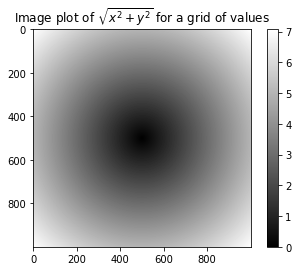

In [41]:
import matplotlib.pyplot as plt

plt.imshow(z,cmap=plt.cm.gray);plt.colorbar()
plt.title('Image plot of $\sqrt{x^2+y^2}$ for a grid of values')

### 4.3.1 条件制御のndarrayでの表現

In [44]:
#condがTrueであればxarrの同位置の要素を、Falseであればyarrの同位置の要素を取る
xarr=np.array([1.1,1.2,1.3,1.4,1.5])
yarr=np.array([2.1,2.2,2.3,2.4,2.5])
cond=np.array([True,False,True,True,False])

In [45]:
#pythonのリスト内包表記による書き方(対象配列が大きいと遅くなる上、多次元配列に対応できない))
result=[(x if c else y) for x,y,c in zip(xarr,yarr,cond)]
result

[1.1, 2.2, 1.3, 1.4, 2.5]

In [46]:
#np.whereを使った書き方
result=np.where(cond,xarr,yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

In [47]:
#正の場合は2に、負の場合は-2に置き換える
arr=np.random.randn(4,4)
arr

array([[ 0.69924758, -0.77174197, -0.6211323 ,  0.33795529],
       [ 0.36523971, -1.1041143 , -0.36317958,  0.44273979],
       [ 2.56565449, -0.62618622,  1.30835086, -0.00395938],
       [-0.42053025, -1.07589691, -0.38045397,  1.36267176]])

In [48]:
arr>0

array([[ True, False, False,  True],
       [ True, False, False,  True],
       [ True, False,  True, False],
       [False, False, False,  True]])

In [49]:
np.where(arr>0,2,-2)    #引数の2番めと3番目はスカラーを渡すこともできる

array([[ 2, -2, -2,  2],
       [ 2, -2, -2,  2],
       [ 2, -2,  2, -2],
       [-2, -2, -2,  2]])

In [50]:
np.where(arr>0,2,arr)   #スカラーとndarrayを組み合わせることもできる

array([[ 2.        , -0.77174197, -0.6211323 ,  2.        ],
       [ 2.        , -1.1041143 , -0.36317958,  2.        ],
       [ 2.        , -0.62618622,  2.        , -0.00395938],
       [-0.42053025, -1.07589691, -0.38045397,  2.        ]])

In [51]:
np.where(arr>0,2)   #elseの省略はできない

ValueError: either both or neither of x and y should be given

### 4.3.2 数学関数、統計関数

In [53]:
arr=np.random.randn(5,4)
arr

array([[ 0.00470343,  0.76545329,  0.96312804, -0.14777725],
       [-0.84974114,  0.3762946 ,  0.26155357, -0.63816127],
       [-0.70165483,  0.40792757,  0.81490876, -0.91774773],
       [-0.14895498, -0.01292605, -0.40756189,  0.5109428 ],
       [ 0.5887987 , -1.46243741,  0.05875389, -0.56117476]])

In [54]:
arr.mean()

-0.05478363196536936

In [55]:
np.mean(arr)

-0.05478363196536936

In [56]:
arr.sum()

-1.0956726393073872

In [57]:
#meanやsumはどの軸を中心に処理するかを引数axisで指定することができる
arr.mean(axis=1)    #行ごとに平均を求める（列方向に足して平均を出す）

array([ 0.39637688, -0.21251356, -0.09914156, -0.01462503, -0.34401489])

In [58]:
arr.sum(axis=0) #列ごとに合計を求める（行方向に足して合計を出す）

array([-1.10684882,  0.074312  ,  1.69078238, -1.7539182 ])

In [61]:
arr.mean(1) #axis=は省略できる

array([ 0.39637688, -0.21251356, -0.09914156, -0.01462503, -0.34401489])

In [62]:
arr.sum(0)  #axis=は省略できる

array([-1.10684882,  0.074312  ,  1.69078238, -1.7539182 ])

In [63]:
arr=np.array([0,1,2,3,4,5,6,7])
arr.cumsum()    #累積和. 途中経過も返す

array([ 0,  1,  3,  6, 10, 15, 21, 28])

In [64]:
arr=np.array([[0,1,2],[3,4,5],[6,7,8]])
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [65]:
arr.cumsum(0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]])

In [66]:
arr.cumprod(1)  #累積積. 途中経過も返す

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]])

### 4.3.3 真偽値配列関数
Trueは１、Falseは０として扱われる

In [67]:
arr=np.random.randn(100)
(arr>0).sum()   #正の数の個数

48

In [68]:
bools=np.array([False,False,True,False])
bools.any() #要素に一つでもTrueがあればTrueを返す

True

In [69]:
bools.all() #要素がすべてTrueであればTrueを返す

False

### 4.3.4 ソート
元のndarrayを直接置換する

In [70]:
arr=np.random.randn(6)
arr

array([ 1.42434409, -0.11509715, -0.1508563 , -1.70204796,  1.02805215,
        0.28365519])

In [72]:
arr.sort()
arr #元のndarrayを直接置換する

array([-1.70204796, -0.1508563 , -0.11509715,  0.28365519,  1.02805215,
        1.42434409])

In [73]:
arr=np.random.randn(5,3)
arr

array([[ 1.37278111,  0.08916635, -0.4332646 ],
       [ 0.3540298 ,  0.27193711,  1.8665573 ],
       [ 1.47300224, -0.4893033 ,  0.69232629],
       [-0.17968678,  0.28663926, -0.96430814],
       [ 1.24744108,  1.03917755,  0.22933465]])

In [74]:
arr.sort(1) #任意の軸に沿ってソートできる
arr

array([[-0.4332646 ,  0.08916635,  1.37278111],
       [ 0.27193711,  0.3540298 ,  1.8665573 ],
       [-0.4893033 ,  0.69232629,  1.47300224],
       [-0.96430814, -0.17968678,  0.28663926],
       [ 0.22933465,  1.03917755,  1.24744108]])

In [76]:
large_arr=np.random.randn(100)
large_arr.sort()
large_arr[int(0.05*len(large_arr))] #5%分位点

-1.6432329298517225

### 4.3.5 集合関数：uniqueなど

In [77]:
names=np.array(['Bob','Joe','Will','Bob','Will','Joe','Joe'])
np.unique(names)    #配列要素から重複を取り除き、ソートして返す

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [78]:
ints=np.array([1,3,4,2,4,6,3,6,3,7])
np.unique(ints)

array([1, 2, 3, 4, 6, 7])

In [79]:
#python標準機能で書く場合
sorted(set(names))  #setで重複を取り除き、sortでソートする

['Bob', 'Joe', 'Will']

In [81]:
values=np.array([3,5,2,6,7,5,6,3,2,6])
np.in1d(values,[3,5,0]) #ある配列内に、指定した要素郡が存在するかどうか判別する

array([ True,  True, False, False, False,  True, False,  True, False,
       False])

## 4.4 ndarrayのファイル出力

In [82]:
arr=np.arange(10)
np.save('outputs/some_array',arr)   #ファイルパスに拡張子を指定しない場合、自動で.npyが付加される

In [83]:
np.load('outputs/some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [84]:
np.savez('outputs/array_archive.npz',a=arr,b=arr)   #複数のndarrayを無圧縮アーカイブとして保管、個々のndarrayを区別するためにキーワードを指定

In [85]:
arch=np.load('outputs/array_archive.npz')
arch['b']   #キーワードを指定して読み込み.遅延読み込みのため、参照された時点で初めて実際にロードされる

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [86]:
np.savez_compressed('outputs/array_compressed.npz',a=arr,b=arr) #データを圧縮して保管したい場合

## 4.5 行列計算
* Numpyでは演算子*（アスタリスク）は配列の対応する要素ごとの積を計算する（MATLABでは内積）
* 内積の計算には関数dotを使用する

In [87]:
x=np.array([[1.,2.,3.],[4.,5.,6.]])
y=np.array([[6.,23.],[-1,7],[8,9]])

In [88]:
x

array([[1., 2., 3.],
       [4., 5., 6.]])

In [89]:
y

array([[ 6., 23.],
       [-1.,  7.],
       [ 8.,  9.]])

In [90]:
x.dot(y)    #内積

array([[ 28.,  64.],
       [ 67., 181.]])

In [91]:
np.dot(x,y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [92]:
np.dot(x,np.ones(3))    #(2,3)*(3,)=(2,)

array([ 6., 15.])

In [93]:
#python3.5から行列の掛け算を表す二項演算子として@が定義されている
x @ np.ones(3)

array([ 6., 15.])

In [109]:
from numpy.linalg import inv,qr

X=np.random.randn(5,5)
mat=X.T.dot(X)  #Xとその転置行列であるX.Tとの内積を計算
mat

array([[ 5.58854217, -1.5315185 , -0.40454096,  4.08006678, -0.95986908],
       [-1.5315185 ,  3.07659388,  0.54821122, -2.84548959,  0.32501657],
       [-0.40454096,  0.54821122,  1.21410311, -0.95337353,  0.51792122],
       [ 4.08006678, -2.84548959, -0.95337353,  7.02664363, -1.92252428],
       [-0.95986908,  0.32501657,  0.51792122, -1.92252428,  0.89851906]])

In [110]:
inv(mat)    #正方行列に対して逆行列を計算する

array([[ 0.32497778, -0.08381313,  0.02917896, -0.28945642, -0.258673  ],
       [-0.08381313,  0.91181832, -0.47367235,  0.75645326,  1.47222143],
       [ 0.02917896, -0.47367235,  1.34883808, -0.44157556, -1.51980331],
       [-0.28945642,  0.75645326, -0.44157556,  1.12639493,  2.08178425],
       [-0.258673  ,  1.47222143, -1.51980331,  2.08178425,  5.63441641]])

In [111]:
mat.dot(inv(mat))

array([[ 1.00000000e+00, -3.23085304e-16, -1.87745088e-17,
         4.47780463e-16,  1.12548636e-15],
       [-2.18932515e-16,  1.00000000e+00, -7.91246806e-18,
         1.94280659e-16, -3.24266173e-16],
       [-1.78553236e-17, -4.82792185e-17,  1.00000000e+00,
         9.39737901e-17,  6.68000156e-17],
       [ 1.87739843e-16,  8.08284666e-17,  3.80483482e-16,
         1.00000000e+00,  6.70358014e-16],
       [ 3.77319817e-17, -1.60282730e-17,  8.28937942e-17,
        -2.39809441e-18,  1.00000000e+00]])

In [112]:
q,r=qr(mat) #QR分解を計算する

In [113]:
r

array([[-7.16305099,  3.54797851,  1.11384221, -8.10545267,  2.06309382],
       [ 0.        , -2.77953407, -0.68393817,  2.65759843, -0.43053092],
       [ 0.        ,  0.        , -1.1861631 ,  1.02589696, -0.75969502],
       [ 0.        ,  0.        ,  0.        , -2.21559031,  0.86902119],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.15689363]])

## 4.6 疑似乱数生成

In [114]:
samples=np.random.normal(size=(4,4))    #正規分布に基づいた乱数を生成する
samples

array([[-0.2845402 , -0.85594468, -0.22846343,  1.03145469],
       [ 0.71179152, -0.48513026, -1.38568184,  1.19030479],
       [ 0.5518322 , -0.34755732, -0.40362739,  1.29461148],
       [-0.82004616,  0.38768837, -0.07918429,  1.38294689]])

In [115]:
#python組み込みの乱数モジュールでは一度に一つの乱数しか生成できないため、パフォーマンスが大きく異る
from random import normalvariate
N=1000000
%timeit samples=[normalvariate(0,1) for _ in range(N)]

904 ms ± 52 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [116]:
%timeit np.random.normal(size=N)

26.9 ms ± 289 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [117]:
np.random.seed(1234)    #乱数シードを設定する

In [118]:
rng=np.random.RandomState(1234) #randomモジュールのグローバルな乱数シードを避けるために、他と分離した乱数生成器を準備する
rng.randn(10)

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873,
        0.88716294,  0.85958841, -0.6365235 ,  0.01569637, -2.24268495])

## 4.7 例：ランダムウォーク

In [119]:
import random

position=0
walk=[position]
steps=1000
for i in range(steps):
    step=1 if random.randint(0,1) else -1   #0か1の乱数を生成し、0であれば1、1であれば-1を返す
    position+=step
    walk.append(position)

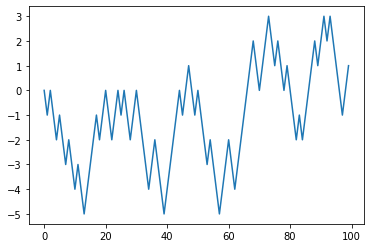

In [120]:
plt.plot(walk[:100])    #最初の１００歩がどのようであったか図示する

In [121]:
nsteps=1000
draws=np.random.randint(0,2,size=nsteps)    #0か1の乱数をnsteps分生成した配列を返す
steps=np.where(draws>0,1,-1)    #各要素が0なら1、1なら-1を格納した配列を返す
walk=steps.cumsum()  #配列の累積和（到達した位置）を計算. たどってきた軌跡が記録される.

In [122]:
walk.min()

-9

In [123]:
walk.max()

60

In [127]:
#初めて原点から１０離れた位置に到達したときの歩数
(np.abs(walk)>=10).argmax()   #絶対値が１０以上でTrueを示す真偽値配列の内、最初に最大値（True=１）を示したインデックスを返す

#argmaxを用いると配列要素の全スキャンが発生するので注意

297

### 4.7.1 多重ランダムウォーク
ランダムウォークを５０００回施行する

In [129]:
nwalks=5000
nsteps=1000
draws=np.random.randint(0,2,size=(nwalks,nsteps))
steps=np.where(draws>0,1,-1)
walks=steps.cumsum(1)

In [130]:
walks

array([[ -1,   0,   1, ...,  -6,  -5,  -4],
       [ -1,  -2,  -1, ..., -18, -19, -18],
       [  1,   0,  -1, ...,  24,  23,  22],
       ...,
       [ -1,   0,  -1, ...,  -2,  -3,  -4],
       [ -1,   0,  -1, ...,  30,  29,  30],
       [  1,   0,  -1, ...,  18,  19,  20]])

In [131]:
walks.max()

137

In [132]:
walks.min()

-137

In [133]:
hits30=(np.abs(walks)>=30).any(1)   #絶対値30以上の値がひとつでもあればTrueになる配列を返す
hits30

array([False,  True,  True, ..., False,  True,  True])

In [134]:
hits30.sum()    #30もしくは-30に到達した施行の数

3431

In [142]:
crossing_times=(np.abs(walks[hits30])>=30).argmax(1)
#walksの中から距離30に到達した施行だけ抜き出し、その要素の絶対値が30以上でTrueとなる真偽値配列を作り、Trueとなる最初のインデックスを各施行ごとに返す
crossing_times

array([267, 989, 923, ..., 937, 575, 197])

In [143]:
crossing_times.mean()   #平均で何歩目に距離30に到達するか計算する

506.2532789274264

In [191]:
class RandomWalk():
    def __init__(self,loc=0,scale=1,nwalks=5000,nsteps=1000):
        draws=np.random.normal(loc=loc,scale=scale,size=(nwalks,nsteps))
        steps=np.where(draws>0,1,-1)
        self.walks=steps.cumsum(1)
        self.crossing_times=None

    def calcurate_crossing_times(self,position=30):
        hits=(np.abs(self.walks)>=position).any(1)
        self.crossing_times=(np.abs(self.walks[hits])>=position).argmax(1)
        return self.crossing_times

    def min_position(self):
        return self.walks.min()

    def max_position(self):
        return self.walks.max()

    def crossing_time_mean(self,position=30):
        if self.crossing_times is None:
            self.crossing_times=self.calcurate_crossing_times(position)
        return self.crossing_times.mean()

In [192]:
r=RandomWalk(0,0.25)
r.crossing_time_mean(30)

506.78511404561823

In [193]:
r.min_position()

-115

In [194]:
r.max_position()

137